# Chapter 13: Graph construction and management in Python

**NetworkX** is a Python package for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks. It is usually imported with the *nx* abbreviation.

## How to install networkx?

We need to install the networkx package.  
*Note: if you have installed geopandas, you most likely also installed networkx already, as one of its dependency.*

### Anaconda - Platform independent

If you have Anaconda installed, open the *Anaconda Prompt* and type in:
```
conda install -c conda-forge networkx
```

### Python Package Installer (pip) - Linux

If you have standalone Python3 and Jupyter Notebook install on Linux, open a command prompt / terminal and type in:
```
pip3 install networkx
```

## How to use networkx?

The netwrokx package is a module which you can simply import. It is usually aliased with the `nx` abbreviation:
```python
import networkx as nx
```

---

## Graph creation

NetworkX supports 4 type of graphs:
* undirected, simple graphs: `Graph`
* directed simple graphs: `DiGraph`
* undirected graph with parallel edges: `MultiGraph`
* directed graph with parallel edges: `MultiDiGraph`

Creation of a new, empty graph is straightforward:

In [1]:
import networkx as nx
graph = nx.Graph() # undirected, simple graph

### Representation

To represent the graphs, two data structures as very common practices are well-known. One has a purely arithmetic representation (*adjacency matrix*), and the other has a mixed arithmetic and chain representation (*edge list* or *neighborhood list*).

#### Adjacency matrix representation

In graph theory and computer science, an adjacency matrix is a square matrix. Its elements indicate whether pairs of vertices are adjacent in the graph or not.

<img alt="Adjacency matrix representation" src="../images/13_adjacency_matrix_1.png" title="Source: http://tamop412.elte.hu/tananyagok/algoritmusok/" style="height: 200px; margin: auto;" />

<img alt="Adjacency matrix representation" src="../images/13_adjacency_matrix_2.png" title="Source: http://tamop412.elte.hu/tananyagok/algoritmusok/" style="height: 200px; margin: auto;" />

#### Edge list representation

The edge list is a data structure used to represent a graph as a list of its edges for each vertices.
The internal data structures of *NetworkX* is based on the *adjacency list* representation and implemented using Python dictionary data structures.

<img alt="Edge list representation" src="../images/13_edge_list_1.png" title="Source: http://tamop412.elte.hu/tananyagok/algoritmusok/" style="height: 170px; margin: auto;" />

<img alt="Edge list representation" src="../images/13_edge_list_2.png" title="Source: http://tamop412.elte.hu/tananyagok/algoritmusok/" style="height: 170px; margin: auto;" />

## Building a graph from scratch

We can add nodes and edges to a graph:

In [2]:
graph.add_node(1)
graph.add_node(2)
graph.add_node(3)
graph.add_node(4)
graph.add_node(5)
graph.add_node(6)
graph.add_node(7)
graph.add_node(8)

In [3]:
graph.add_edge(1, 2)
graph.add_edge(1, 3)
graph.add_edge(1, 4)
graph.add_edge(2, 3)
graph.add_edge(2, 5)
graph.add_edge(2, 6)
graph.add_edge(3, 6)
graph.add_edge(4, 5)
graph.add_edge(4, 7)

Adding an edge to a non-existing node will also create that particular node:

In [4]:
graph.add_edge(1, 9)

## Graph visualization with Matplotlib

*NetworkX* has **tight integration** with *matplotlib*, therefore visualization of a graph can be done easily.

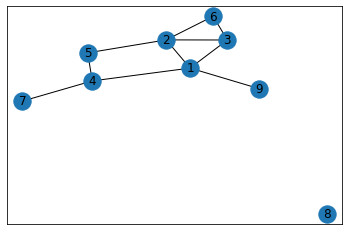

In [5]:
import matplotlib.pyplot as plt

# Special Jupyter Notebook command, so the plots by matplotlib will be displayed inside the Jupyter Notebook
%matplotlib inline

nx.draw_networkx(graph)
plt.show()

---

## Building a graph from a *pandas* DataFrame

Let's use the following basic dataset of airroutes flight data:
 1. From city
 2. To city
 3. Distance

The dataset is given in the `flights.csv` file in the `data` folder. The used delimiter is the semicolon (`;`) character.

Parse the CSV file into a *pandas* DataFrame:

In [6]:
import pandas as pd

flight_table = pd.read_csv('../data/flights.csv', delimiter = ';')
display(flight_table)

,From city,To city,Distance
0,London,Paris,342
1,London,Berlin,932
2,London,Oslo,1153
3,Paris,Zurich,488
4,Paris,Budapest,1244
5,Paris,Rome,1106
6,Paris,Madrid,1052
7,Madrid,Rome,1363
8,Madrid,Athens,2370
9,Oslo,Stockholm,416


*NetworkX* has a **from** and **to** conversion for *pandas* DataFrames. Assuming all airroutes are bi-directional, build an undirected graph:

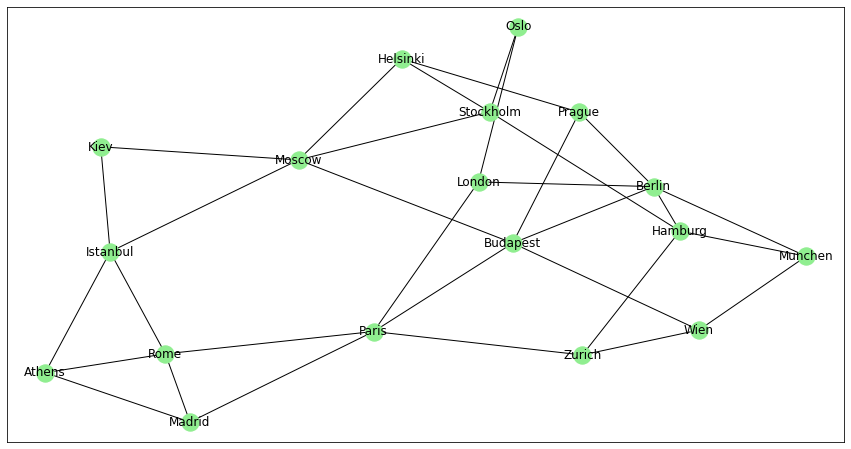

In [7]:
flight_graph = nx.from_pandas_edgelist(flight_table, 'From city', 'To city')
plt.figure(figsize=[15,8])
nx.draw_networkx(flight_graph, node_color = 'lightgreen')
plt.show()

You can define the type of the graph with the optional `create_using` parameter. Its default value is `Graph`.
```python
nx.from_pandas_edgelist(flight_table, 'From city', 'To city', create_using = nx.DiGraph)
```

---

## Building a graph from a CSV file *(optional)*

As an alternative solution a CSV file can be processed line-by-line with the built-in **csv** Python package:

Reading flight London <=> Paris, distance: 342km
Reading flight London <=> Berlin, distance: 932km
Reading flight London <=> Oslo, distance: 1153km
Reading flight Paris <=> Zurich, distance: 488km
Reading flight Paris <=> Budapest, distance: 1244km
Reading flight Paris <=> Rome, distance: 1106km
Reading flight Paris <=> Madrid, distance: 1052km
Reading flight Madrid <=> Rome, distance: 1363km
Reading flight Madrid <=> Athens, distance: 2370km
Reading flight Oslo <=> Stockholm, distance: 416km
Reading flight Stockholm <=> Helsinki, distance: 395km
Reading flight Stockholm <=> Moscow, distance: 1227km
Reading flight Helsinki <=> Moscow, distance: 892km
Reading flight Helsinki <=> Prague, distance: 1301km
Reading flight Hamburg <=> Stockholm, distance: 810km
Reading flight Hamburg <=> Berlin, distance: 255km
Reading flight Hamburg <=> Munchen, distance: 612km
Reading flight Hamburg <=> Zurich, distance: 695km
Reading flight Berlin <=> Munchen, distance: 504km
Reading flight Berlin <=> Bud

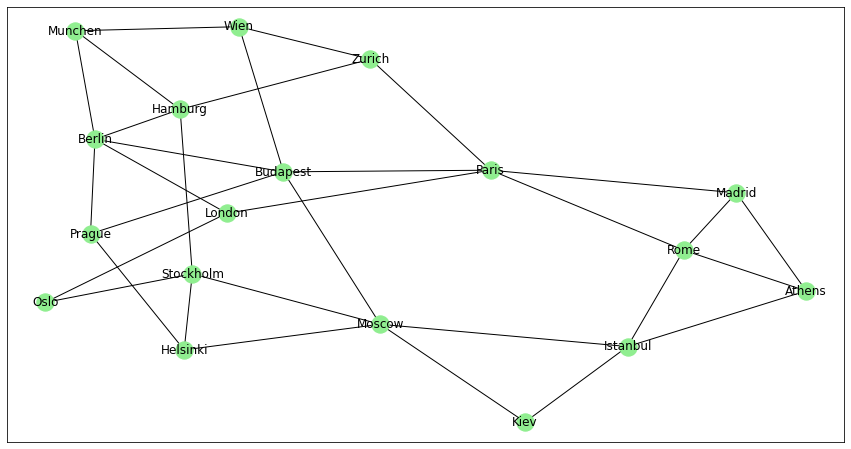

In [8]:
import csv

flight_graph = nx.Graph()

csv_file = open('../data/flights.csv')
csv_reader = csv.reader(csv_file, delimiter=';')
next(csv_reader, None) # skip header line
for row in csv_reader:
    print('Reading flight {0} <=> {1}, distance: {2}km'.format(row[0], row[1], row[2]))
    flight_graph.add_edge(row[0], row[1])
csv_file.close()

plt.figure(figsize=[15,8])
nx.draw_networkx(flight_graph, node_color = 'lightgreen')
plt.show()

Closing an opened file is easy to forget and a common programmer mistake. Use the `with` statement, which will automatically close the file (if it was successfully opened):

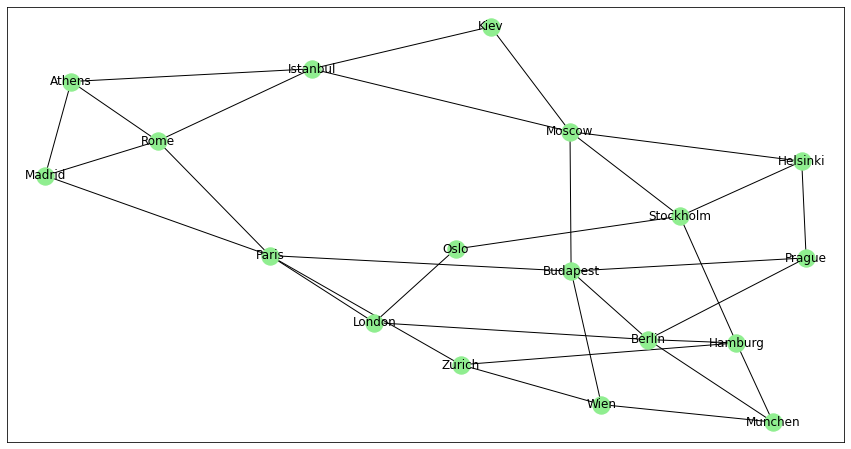

In [9]:
flight_graph = nx.Graph()

with open('../data/flights.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=';')
    next(csv_reader, None) # skip header line
    for row in csv_reader:
        #print('Reading flight {0} <=> {1}, distance: {2}km'.format(row[0], row[1], row[2]))
        flight_graph.add_edge(row[0], row[1])

plt.figure(figsize=[15,8])
nx.draw_networkx(flight_graph, node_color = 'lightgreen')
plt.show()

---

## Analyzing the graph

### Querying the size and degree information

In [10]:
print('Number of nodes: {0}'.format(flight_graph.order()))
print('Number of edges:{0}'.format(flight_graph.size()))
print('Degrees of the nodes: {0}'.format(flight_graph.degree()))

Number of nodes: 18
Number of edges:32
Degrees of the nodes: [('London', 3), ('Paris', 5), ('Berlin', 5), ('Oslo', 2), ('Zurich', 3), ('Budapest', 5), ('Rome', 4), ('Madrid', 3), ('Athens', 3), ('Stockholm', 4), ('Helsinki', 3), ('Moscow', 5), ('Prague', 3), ('Hamburg', 4), ('Munchen', 3), ('Wien', 3), ('Istanbul', 4), ('Kiev', 2)]


For *directed graphs*, there is also `in_degree` and `out_degree` defined.

### Iterate through the nodes

In [11]:
for node in flight_graph.nodes:
    print(node)

London
Paris
Berlin
Oslo
Zurich
Budapest
Rome
Madrid
Athens
Stockholm
Helsinki
Moscow
Prague
Hamburg
Munchen
Wien
Istanbul
Kiev


*Note: iterating through the graph itself (`flight_graph`) is the same.*

### Iterate through the edges

In [12]:
for from_node, to_node in flight_graph.edges:
    print("{0} <=> {1}".format(from_node, to_node))

London <=> Paris
London <=> Berlin
London <=> Oslo
Paris <=> Zurich
Paris <=> Budapest
Paris <=> Rome
Paris <=> Madrid
Berlin <=> Hamburg
Berlin <=> Munchen
Berlin <=> Budapest
Berlin <=> Prague
Oslo <=> Stockholm
Zurich <=> Hamburg
Zurich <=> Wien
Budapest <=> Wien
Budapest <=> Prague
Budapest <=> Moscow
Rome <=> Madrid
Rome <=> Istanbul
Rome <=> Athens
Madrid <=> Athens
Athens <=> Istanbul
Stockholm <=> Helsinki
Stockholm <=> Moscow
Stockholm <=> Hamburg
Helsinki <=> Moscow
Helsinki <=> Prague
Moscow <=> Istanbul
Moscow <=> Kiev
Hamburg <=> Munchen
Munchen <=> Wien
Istanbul <=> Kiev


### Query the neighbors of a node

In [13]:
for neighbor in flight_graph.neighbors('Budapest'):
    print(neighbor)

Paris
Berlin
Wien
Prague
Moscow


Pay attention that it is written as `neighbors` (American English) and *NOT* `neighbours` (British English).

### Check node and edge existence

In [14]:
if flight_graph.has_node('Budapest'):
    print('The Budapest node exists.')
if flight_graph.has_edge('Budapest', 'Paris'):
    print('The Budapest <=> Paris edge exists.')

The Budapest node exists.
The Budapest <=> Paris edge exists.


---

## Weighted graphs

Attributes (metadata) can be assigned to the nodes and edges of a graph.

### Building weighted graphs

When creating the graph from a *pandas* DataFrame, the 4<sup>th</sup> parameter of the `from_pandas_edgelist` function defines which *Series* (columns) of the *DataFrame* shall be added to the edges as attributes. If `True`, all the remaining columns will be added. If `None`, no edge attributes are added to the graph. Its default value is `None`.

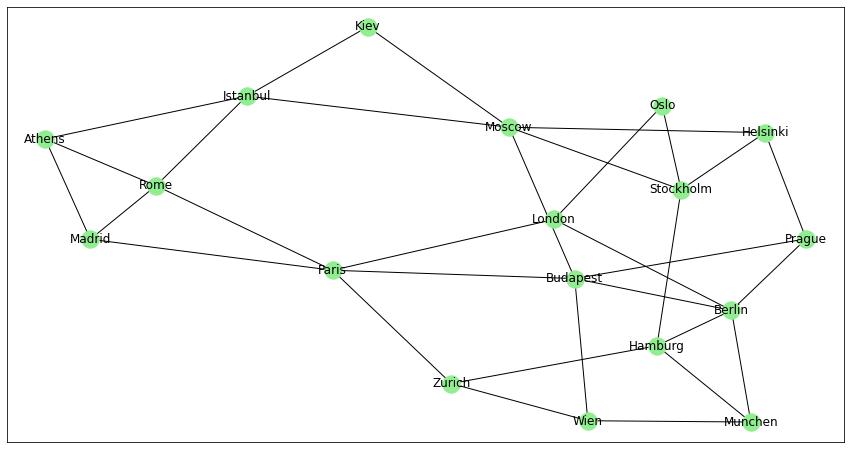

In [15]:
flight_graph = nx.from_pandas_edgelist(flight_table, 'From city', 'To city', ['Distance'])
plt.figure(figsize=[15,8])
nx.draw_networkx(flight_graph, node_color = 'lightgreen')
plt.show()

*Optional:* when building a graph "manually", the node and edge attributes can be passed to the `add_node` an `add_edge` methods.

In [16]:
flight_graph = nx.Graph()

with open('../data/flights.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=';')
    next(csv_reader, None) # skip header line
    for row in csv_reader:
        print('Reading flight {0} <=> {1}, distance: {2}km'.format(row[0], row[1], row[2]))
        flight_graph.add_edge(row[0], row[1], dist = row[2])

Reading flight London <=> Paris, distance: 342km
Reading flight London <=> Berlin, distance: 932km
Reading flight London <=> Oslo, distance: 1153km
Reading flight Paris <=> Zurich, distance: 488km
Reading flight Paris <=> Budapest, distance: 1244km
Reading flight Paris <=> Rome, distance: 1106km
Reading flight Paris <=> Madrid, distance: 1052km
Reading flight Madrid <=> Rome, distance: 1363km
Reading flight Madrid <=> Athens, distance: 2370km
Reading flight Oslo <=> Stockholm, distance: 416km
Reading flight Stockholm <=> Helsinki, distance: 395km
Reading flight Stockholm <=> Moscow, distance: 1227km
Reading flight Helsinki <=> Moscow, distance: 892km
Reading flight Helsinki <=> Prague, distance: 1301km
Reading flight Hamburg <=> Stockholm, distance: 810km
Reading flight Hamburg <=> Berlin, distance: 255km
Reading flight Hamburg <=> Munchen, distance: 612km
Reading flight Hamburg <=> Zurich, distance: 695km
Reading flight Berlin <=> Munchen, distance: 504km
Reading flight Berlin <=> Bud

### Query the edge metadata

The metadata, called the *weight* of an edge can be queried then:

In [17]:
print('Metadata for the Budapest <=> Paris edge: {0}'.format(flight_graph['Budapest']['Paris']))
print('Metadata for all edges from Budapest: {0}'.format(flight_graph['Budapest']))

Metadata for the Budapest <=> Paris edge: {'dist': '1244'}
Metadata for all edges from Budapest: {'Paris': {'dist': '1244'}, 'Berlin': {'dist': '688'}, 'Wien': {'dist': '214'}, 'Prague': {'dist': '444'}, 'Moscow': {'dist': '1569'}}


---

## Further readings

* Check out the official [NetworkX tutorial](https://networkx.github.io/documentation/stable/tutorial.html).
* Browse the official [NetworkX reference](https://networkx.github.io/documentation/stable/reference/index.html).

---

## Breadth-first search

Breadth-first search (*BFS*) is an algorithm for traversing or searching a graph. It starts at some arbitrary node of a graph, and explores all the neighbour nodes at the present depth prior to moving on to the nodes at the next depth level.

![Breadth-first search](../images/13_bfs.png "Source: http://tamop412.elte.hu/tananyagok/algoritmusok/")

The breadth-first search traversal can be implemented with a *queue* data structure (see [Chapter 7](07_collections.ipynb#Queues)).  
As a showcase, let's request a starting city from the user and a number of maximum flights. Calculate which cities can be reached!
Handle the case of a not existing starting city.

In [18]:
from collections import deque

start_city = input('Start city: ')
flight_count = int(input('Max number of flights: '))

# Check existence of start city
if flight_graph.has_node(start_city):
    ready_list = []
    process_queue = deque([(start_city, 0)])
    
    # Process until queue is empty
    while len(process_queue) > 0:
        # Move first item of process queue to ready list
        process_item = process_queue.popleft()
        process_city, process_dist = process_item 
        ready_list.append(process_item)
        
        # NOTE: if process_dist > flight_count, we can halt the algorithm here, 
        # all reachable cities are in the ready list
        #if process_dist > flight_count:
        #    break
        
        # "Expand" the processed node: add its neighbors to the process queue
        for neighbor_city in flight_graph.neighbors(process_city):
            # Only add neighbors which are not already in the ready list or the process_queue
            found = (neighbor_city in [city for city, dist in process_queue] or 
                     neighbor_city in [city for city, dist in ready_list])
            
            if not found:
                process_queue.append((neighbor_city, process_dist + 1))
    
    # Display results
    for city, dist in ready_list:
        if dist <= flight_count:
            print(city)
else:
    print('{0} city is unknown' % start_city)

Start city:  Budapest
Max number of flights:  3


Budapest
Paris
Berlin
Wien
Prague
Moscow
London
Zurich
Rome
Madrid
Hamburg
Munchen
Helsinki
Stockholm
Istanbul
Kiev
Oslo
Athens


*NetworkX* contains several [traversal algorithms](https://networkx.github.io/documentation/stable/reference/algorithms/traversal.html) out of the box, so we don't need to reimplement them.

In [19]:
start_city = input('Start city: ')
flight_count = int(input('Max number of flights: '))

# Check existence of start city
if flight_graph.has_node(start_city):
    reachable_cities = [ start_city ]

    # Do breadth first search
    successors = nx.bfs_successors(flight_graph, start_city, flight_count - 1)
    for item in successors:
        print('{0} -> {1}'.format(item[0], item[1]))
        reachable_cities += item[1]

    print('Reachable cities: {0}'.format(reachable_cities))
else:
    print('{0} city is unknown'.format(start_city))

Start city:  Budapest
Max number of flights:  3


Budapest -> ['Paris', 'Berlin', 'Wien', 'Prague', 'Moscow']
Paris -> ['London', 'Zurich', 'Rome', 'Madrid']
Berlin -> ['Hamburg', 'Munchen']
Prague -> ['Helsinki']
Moscow -> ['Stockholm', 'Istanbul', 'Kiev']
Reachable cities: ['Budapest', 'Paris', 'Berlin', 'Wien', 'Prague', 'Moscow', 'London', 'Zurich', 'Rome', 'Madrid', 'Hamburg', 'Munchen', 'Helsinki', 'Stockholm', 'Istanbul', 'Kiev']
